In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms.functional as F
import torch
%matplotlib inline

### Load dataset

In [13]:
data = torch.load('data/processed/training_letters.pt')

### Sample some data

In [14]:
images, labels = data
indices = torch.from_numpy(np.random.choice(images.size(0), size=400, replace=False))
sampled_images = images.index_select(0, indices)
sampled_labels = labels.index_select(0, indices)

### Visualize images and labels

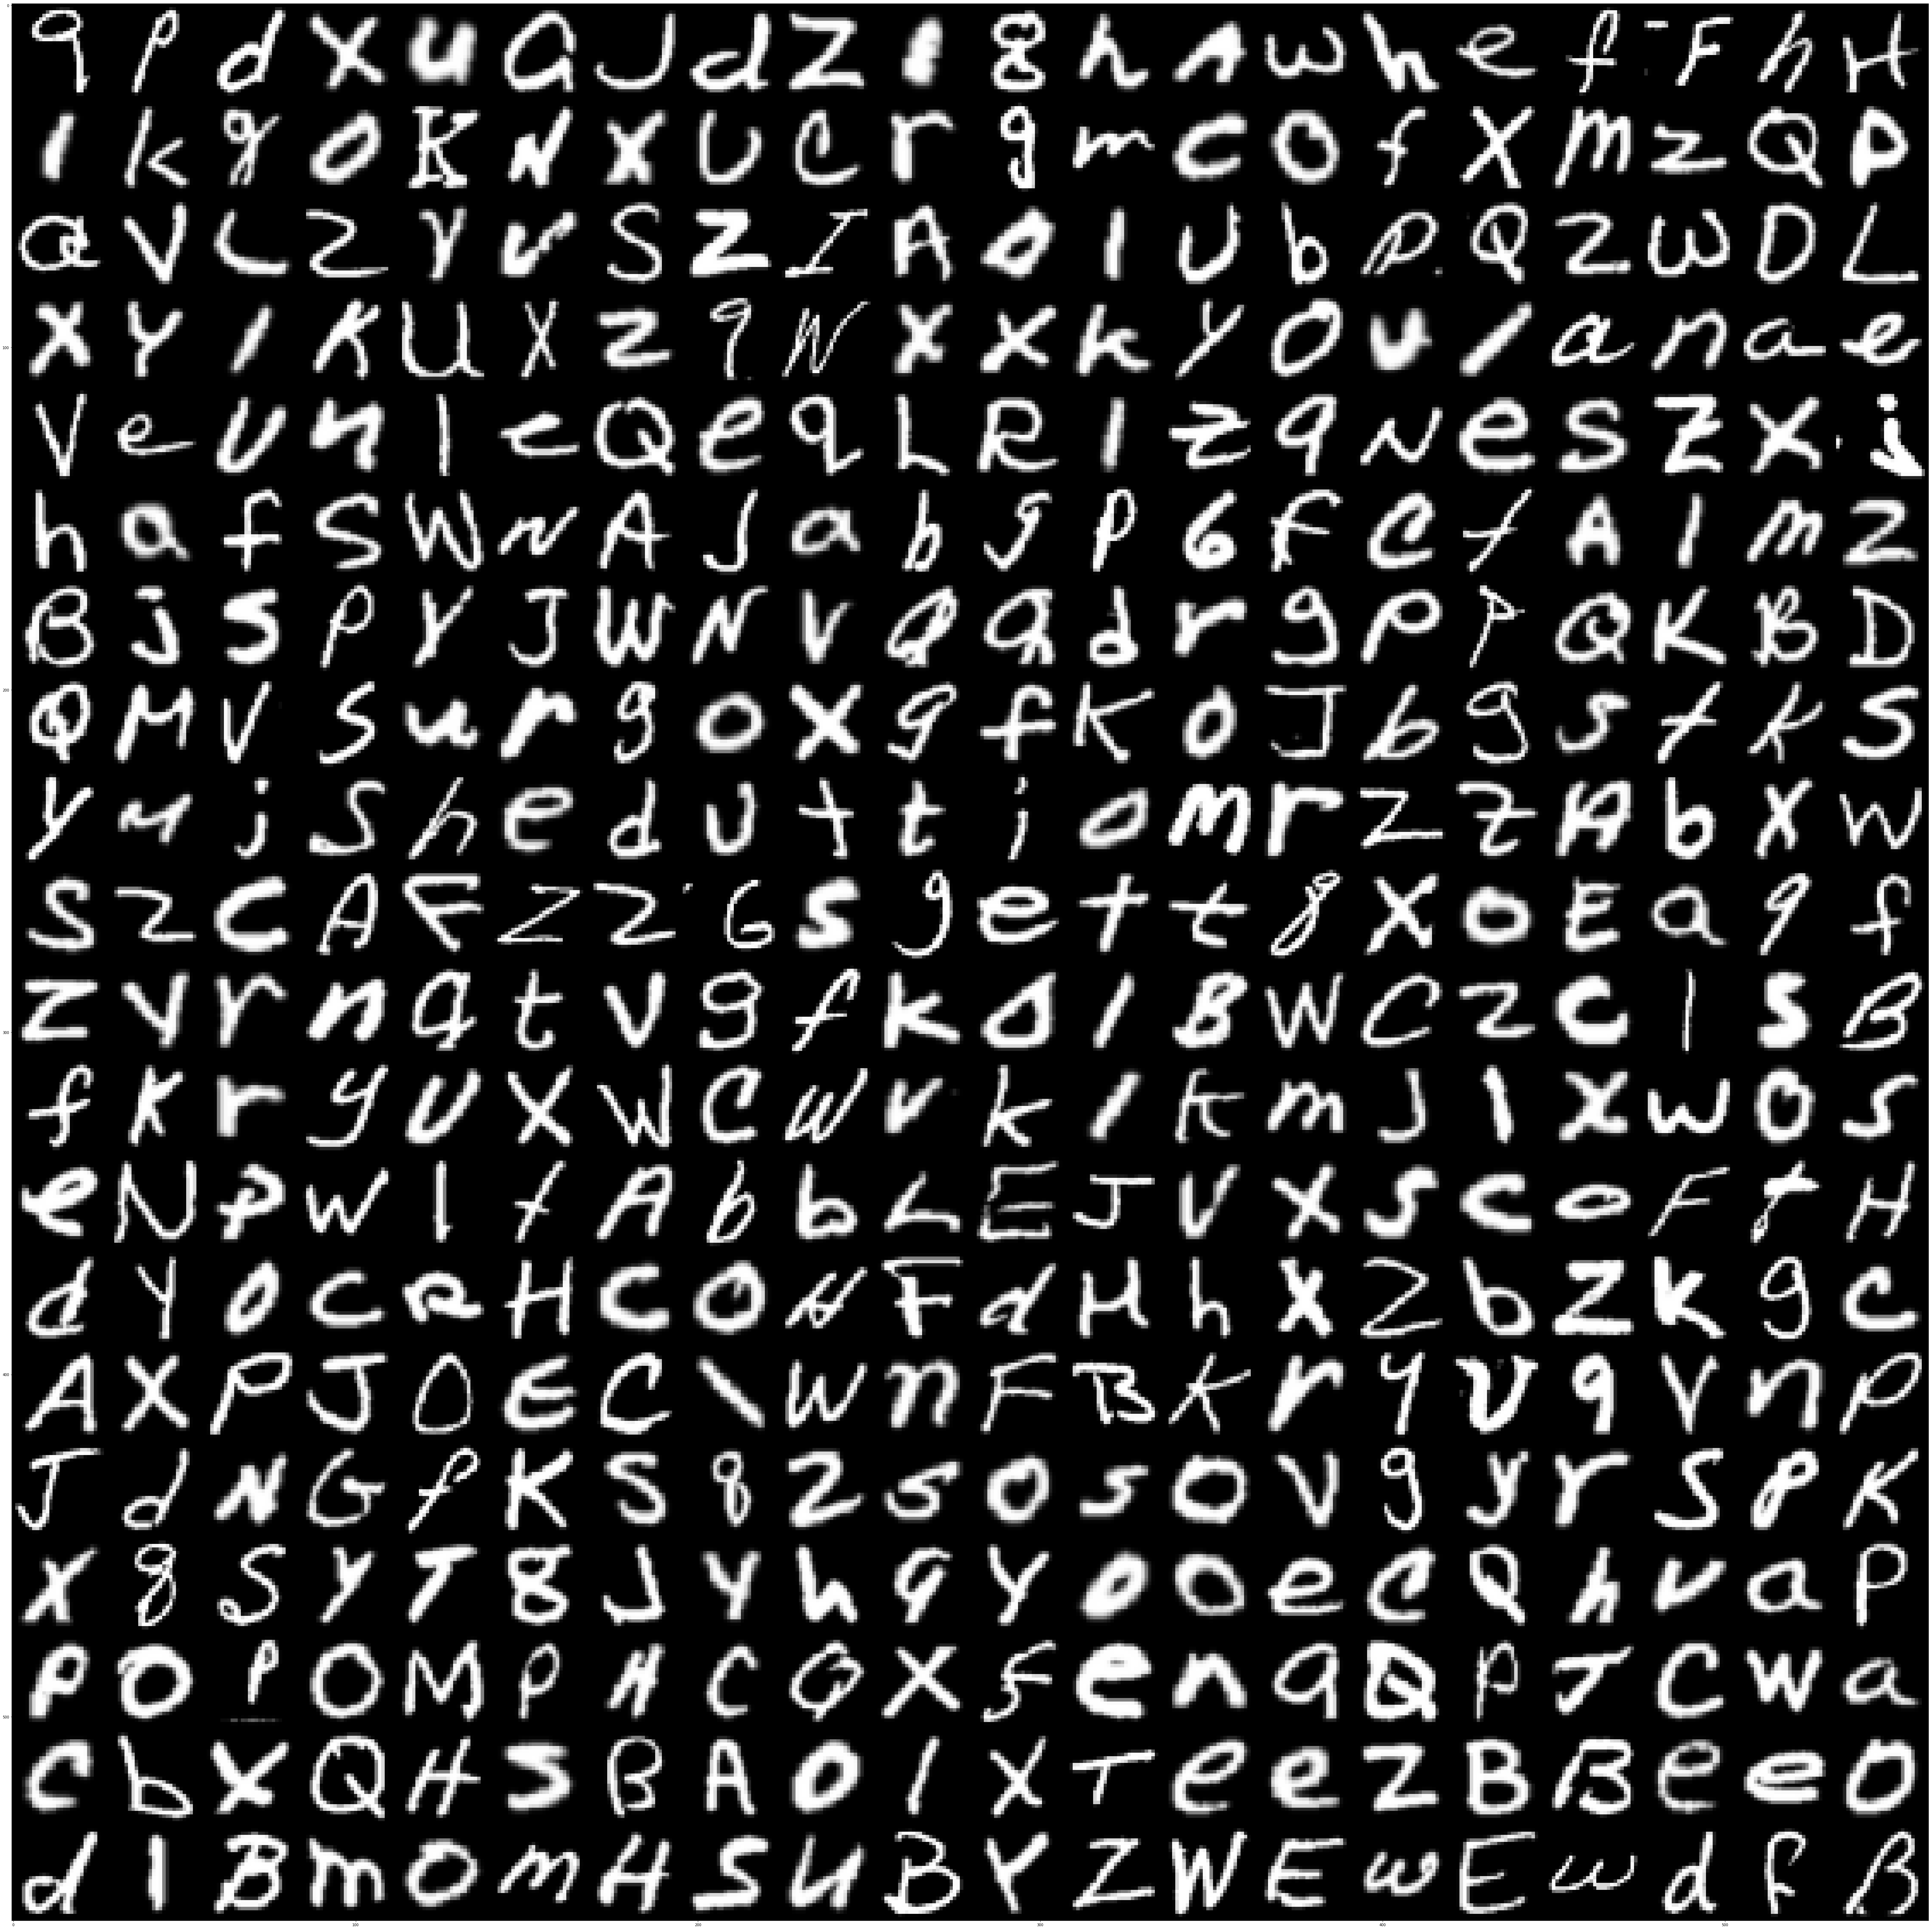

In [15]:
plt.figure(figsize=(100, 100))
plt.imshow(sampled_images.view(20, 20, 28, 28).permute(0, 3, 1, 2).contiguous().view(20*28, 20*28).numpy(), cmap='gray')
plt.show()

In [23]:
table = [[chr(96+i) for i in sampled_labels[20 * j:20 * (j+1)]] for j in range(20)]
print('\n'.join([' '.join(row) for row in table]))

g p d x u a j d z i g h a w h e f f h w
i k g o k n x u c r g m c o f x m z q p
a v l z y v s z i a o i u b p q z w d l
x y i k u x z q w x x k y o u l a n a e
v e u n l c q e q l r i z q n e s z x j
h a f s w n a j a b g p g f c t a i m z
b j s p x j w n v q q d r g p p q k b d
q m v s u r g o x g f k o j b g s t k s
y m j s h e d u t t j o m r z z a b x w
s z c a f z z g s g e t t q x o e a q f
z y r n g t v g f k o i b w c z c l s b
f k r y u x w c w v k i k m j l x w o s
e n p w l t a b b l e j v x s c o f t h
d y o c r h c o h f d h h x z b z k g c
a x p j o e c i w n f b k r y u g v n p
j d n g f k s q z s o s o v g y r s p k
x q s y t g j y h q y o o e c q h v a p
p o p o m p h c q x f e n g q p j c w a
c b x q h s b a o l x t e e z b b e e o
d i b m o m h s u b y z w e w e w d f b


### Compute mean and standard deviation

In [30]:
float_images = torch.stack([F.to_tensor(Image.fromarray(x.numpy(), mode='L')) for x in images])
print('mean: {:.4f}, std: {:.4f}'.format(float_images.mean(), float_images.std()))

mean: 0.1722, std: 0.3309
